# Histogram of Oriented Gradients (HOG)

Name: Khushi Agarwal
Regno: 21BRS1529

<hr>

### Loading and Displaying the Image

In [20]:
# Importing the libraries
import copy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2 

%matplotlib inline

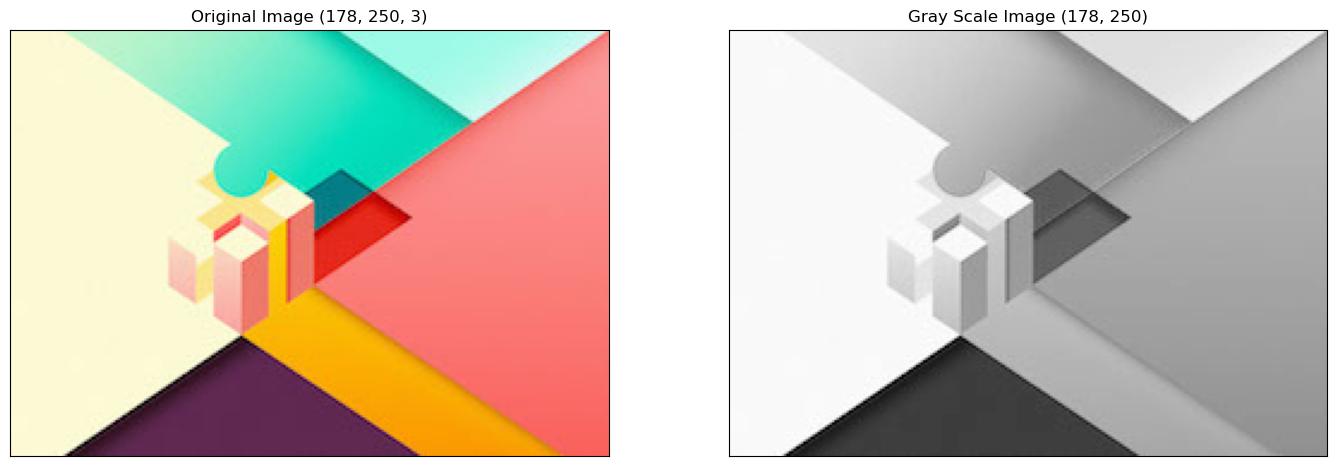

In [22]:
# Setting the default figure size
plt.rcParams['figure.figsize'] = [17.0, 7.0]

# Loading the image
image = cv2.imread("./images/graphic.jpeg")

# Converting BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Converting RGB to Gray scale
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Visualizing the image
plt.subplot(121)
plt.title("Original Image " + str(image.shape))
plt.imshow(image)
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.title("Gray Scale Image " + str(gray_image.shape))
plt.imshow(gray_image, cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.show()

<hr>

### Creating HOG Descriptor (Feature Vector)

In [23]:
# Parameters for HOG descriptor
cell_size = (6, 6)
num_cells_per_block = (2, 2)
h_stride = 1
v_stride = 1
num_bins = 9

# Setting parameters for HOG descriptor

# Block size
block_size = (num_cells_per_block[0] * cell_size[0],
              num_cells_per_block[1] * cell_size[1])

# Total number of cells in image
x_cell = gray_image.shape[1] // cell_size[0]
y_cell = gray_image.shape[0] // cell_size[1]

# Block stride
block_stride = (cell_size[0] * h_stride, 
                cell_size[1] * v_stride)

# Window size
win_size = (x_cell * cell_size[0],
            y_cell * cell_size[1])

# Printing the parameters
print("==========================================")
print("| HOG Descriptor Parameters:")
print("| ")
print("| ==> Window size: ", win_size)
print("| ==> Cell size: ", cell_size)
print("| ==> Block size: ", block_size)
print("| ==> Block stride of: ", block_stride)
print("| ==> Number of bins: ", num_bins)
print("==========================================\n")

# Setting the parameters of HOG descriptor
HOG = cv2.HOGDescriptor(win_size,                       # Size of detection window in pixels 
                        block_size,                     # Defines how many cells are in each block. 
                        block_stride,                   # Defines the distance between adjecent blocks
                        cell_size,                      # Determines the size fo your cell
                        num_bins)                       # Number of bins for the histograms.
                        #win_sigma = DEFAULT_WIN_SIGMA, # Default: Gaussian smoothing window parameter.
                        #threshold_L2hys = 0.2,         # Default: L2-Hys (Lowe-style clipped L2 norm) normalization method shrinkage. The L2-Hys method is used to normalize the blocks and it consists of an L2-norm followed by clipping and a renormalization.
                        #gamma_correction = True        # Default: Flag to specify whether the gamma correction preprocessing is required or not. 
                        #nlevels = DEFAULT_NLEVELS)     # Default: Maximum number of detection window increases.

# Compute HOG descriptor for gray scale image
HOG_descriptor = HOG.compute(gray_image) 

print("==========================================")
print("| ==> HOG Descriptor's shape: ", HOG_descriptor.shape)
print("==========================================\n")

| HOG Descriptor Parameters:
| 
| ==> Window size:  (246, 174)
| ==> Cell size:  (6, 6)
| ==> Block size:  (12, 12)
| ==> Block stride of:  (6, 6)
| ==> Number of bins:  9

| ==> HOG Descriptor's shape:  (40320,)



<hr>

### Number of elements in HOG descriptor

#### Number of elements in HOG descriptor
The HOG descriptor is a long vector containing the normalized histograms from cells and from blocks in detection window. The total size or elemets of HOG feature vector can be calculated by:

<span class="mathquill">
\begin{equation}
\mbox{Total elements} = (\mbox{Number of blocks})\mbox{ } \times \mbox{ } (\mbox{Number of cells in block})\mbox{ } \times \mbox{ } (\mbox{Number of bins})
\end{equation}
</span>


#### Number of blocks in width and height of the detection window

The total number of blocks in width or height can be calculated by:

<span class="mathquill">
\begin{equation}
\mbox{Total number of blocks}_i = \left(\frac{\mbox{(Total number of cells)}_i - \mbox{(Number of cells in block)}_i}{Stride_i}\right) + 1\mbox{  }; \mbox{  for  } i = x,y
\end{equation}
</span>


For example for getting the number of blocks in width of the detection window, we can calculate:


<span class="mathquill">
\begin{equation}
\mbox{Total number of blocks}_x = \left(\frac{\mbox{(Total number of cells)}_x - \mbox{(Number of cells in block)}_x}{Stride_x}\right) + 1\mbox{  }
\end{equation}
</span>


Or for getting the number of blocks in height of the detection window, we can calculate:


<span class="mathquill">
\begin{equation}
\mbox{Total number of blocks}_y = \left(\frac{\mbox{(Total number of cells)}_y - \mbox{(Number of cells in block)}_y}{Stride_y}\right) + 1\mbox{  }
\end{equation}
</span>

In [24]:
# Total number of blocks in width of the detection window
total_blocks_x = np.uint32(((x_cell - num_cells_per_block[0]) / h_stride) + 1)
print("==> Total number of blocks in width of the detection window: ", total_blocks_x)

# Total number of blocks in height of the detection window
total_blocks_y = np.uint32(((y_cell - num_cells_per_block[1]) / v_stride) + 1)
print("==> Total number of blocks in height of the detection window: ", total_blocks_y)

# Total number of elements in feature vector
total_elements = (total_blocks_x) * (total_blocks_y) * num_cells_per_block[0] * num_cells_per_block[1] * num_bins
print("==> Total elements: ", total_elements)

==> Total number of blocks in width of the detection window:  40
==> Total number of blocks in height of the detection window:  28
==> Total elements:  40320


<hr>

### Visualizing the HOG descriptor

In [25]:
# Setting the default figure size
plt.rcParams['figure.figsize'] = [10, 20]

In [26]:
# Reshaping the feature vector to: [block_y, block_x, num_cells_block_x, num_cells_per_block_y, num_bins]
hog_descriptor_reshaped = HOG_descriptor.reshape(total_blocks_x,
                                                 total_blocks_y,
                                                 num_cells_per_block[0],
                                                 num_cells_per_block[1],
                                                 num_bins)


# Transposing the blocks_x and blocks_y: the first index (blocks_y) referes to the row number and the second index to the column number.
hog_descriptor_reshaped = hog_descriptor_reshaped.transpose((1, 0, 2, 3, 4))

print("==> Shape of the HOG descriptor before reshaping: ", HOG_descriptor.shape)
print("==> Shape of the HOG descriptor after reshaping: ", hog_descriptor_reshaped.shape)

==> Shape of the HOG descriptor before reshaping:  (40320,)
==> Shape of the HOG descriptor after reshaping:  (28, 40, 2, 2, 9)


In [27]:
# Initializing "Average Gradient per Cell" with zeros
ave_grad = np.zeros((y_cell, x_cell, num_bins))


print("==> Shape of the average gradient: ", ave_grad.shape)

==> Shape of the average gradient:  (29, 41, 9)


In [28]:
# Initializing an array of zeros for counting the number of histograms per cell
hist_counter = np.zeros((y_cell, x_cell, 1))

print("==> Shape of the histogram counter: ", hist_counter.shape)

==> Shape of the histogram counter:  (29, 41, 1)


In [29]:
# Adding up all the histograms for each cell

# Iterating through horizontal cells
for i in range (num_cells_per_block[0]):
    
    # Iterating through vertival celss
    for j in range(num_cells_per_block[1]):
        
        # Average gradient per cell
        ave_grad[i:total_blocks_y + i,
                 j:total_blocks_x + j] += hog_descriptor_reshaped[:, :, i, j, :]
        
        # Histogram counter
        hist_counter[i:total_blocks_y + i,
                     j:total_blocks_x + j] += 1

In [30]:
# Average gradient for each cell
ave_grad /= hist_counter

In [31]:
# Total number of vectors in all cells
len_vecs = ave_grad.shape[0] * ave_grad.shape[1] * ave_grad.shape[2]

print("==> Total number of vecctors in all cells: ", len_vecs)

==> Total number of vecctors in all cells:  10701


In [32]:
# Equally spacing degrees between 0-180 degrees radians to the num_bins
deg = np.linspace(0, np.pi, num_bins, endpoint = False)

print("==> Total length of our degrees: ", len(deg), "\n")
print("==> Degrees (radians): ", ["{0:.2f}".format(i) for i in deg])

==> Total length of our degrees:  9 

==> Degrees (radians):  ['0.00', '0.35', '0.70', '1.05', '1.40', '1.75', '2.09', '2.44', '2.79']


<hr>

Each cell will have a histogram with num_bins. For each cell, plot each bin as a vector so as:

- **Height of the bin =** vector's magnitude

- **Bins on x axis =** vector's angle

For doing so, create rank 1 arrays for holding the **(x,y)-coordinate** of all the vectors in all the cells in the image. and also, create the rank 1 arrays for holding all the **(U,V)-components** of all the vectors in all the cells in the image.

In [33]:
# Creating arrays for holding components of vector
U = np.zeros((len_vecs))
V = np.zeros((len_vecs))

# Creating arrays for holding positions of vector
X = np.zeros((len_vecs))
Y = np.zeros((len_vecs))

In [34]:
# Set the counter to zero
counter = 0

# Calculating the positions and components

# Iterating thorogh x axis of average_gradients
for i in range(ave_grad.shape[0]):
    
    # Iterating through y axis of average_gradients
    for j in range(ave_grad.shape[1]):
        
        # Iterating through z axis of average_gradients
        for k in range(ave_grad.shape[2]):
            
            # Computing Components
            U[counter] = ave_grad[i,j,k] * np.cos(deg[k])
            V[counter] = ave_grad[i,j,k] * np.sin(deg[k])
        
            # Computing positions
            X[counter] = (cell_size[0] / 2) + (cell_size[0] * i)
            Y[counter] = (cell_size[1] / 2) + (cell_size[1] * j)
        
            # Incrementing the counter
            counter = counter + 1

In [35]:
# Equally spacing degrees between 0-180 degrees (not radians) to the num_bins
angle_axis = np.linspace(0, 180, num_bins, endpoint = False)

print("==> Total length of our degrees: ", len(angle_axis), "\n")
print("==> Degrees (before): ", ["{0:.2f}".format(i) for i in angle_axis], '\n')

# Adding (half of two degrees = 10) degrees to each
angle_axis += ((angle_axis[1] - angle_axis[0]) / 2)

print("==> Degrees (after): ", ["{0:.2f}".format(i) for i in angle_axis])

==> Total length of our degrees:  9 

==> Degrees (before):  ['0.00', '20.00', '40.00', '60.00', '80.00', '100.00', '120.00', '140.00', '160.00'] 

==> Degrees (after):  ['10.00', '30.00', '50.00', '70.00', '90.00', '110.00', '130.00', '150.00', '170.00']


Sometimes you have to run the below cell twice.

<IPython.core.display.Javascript object>


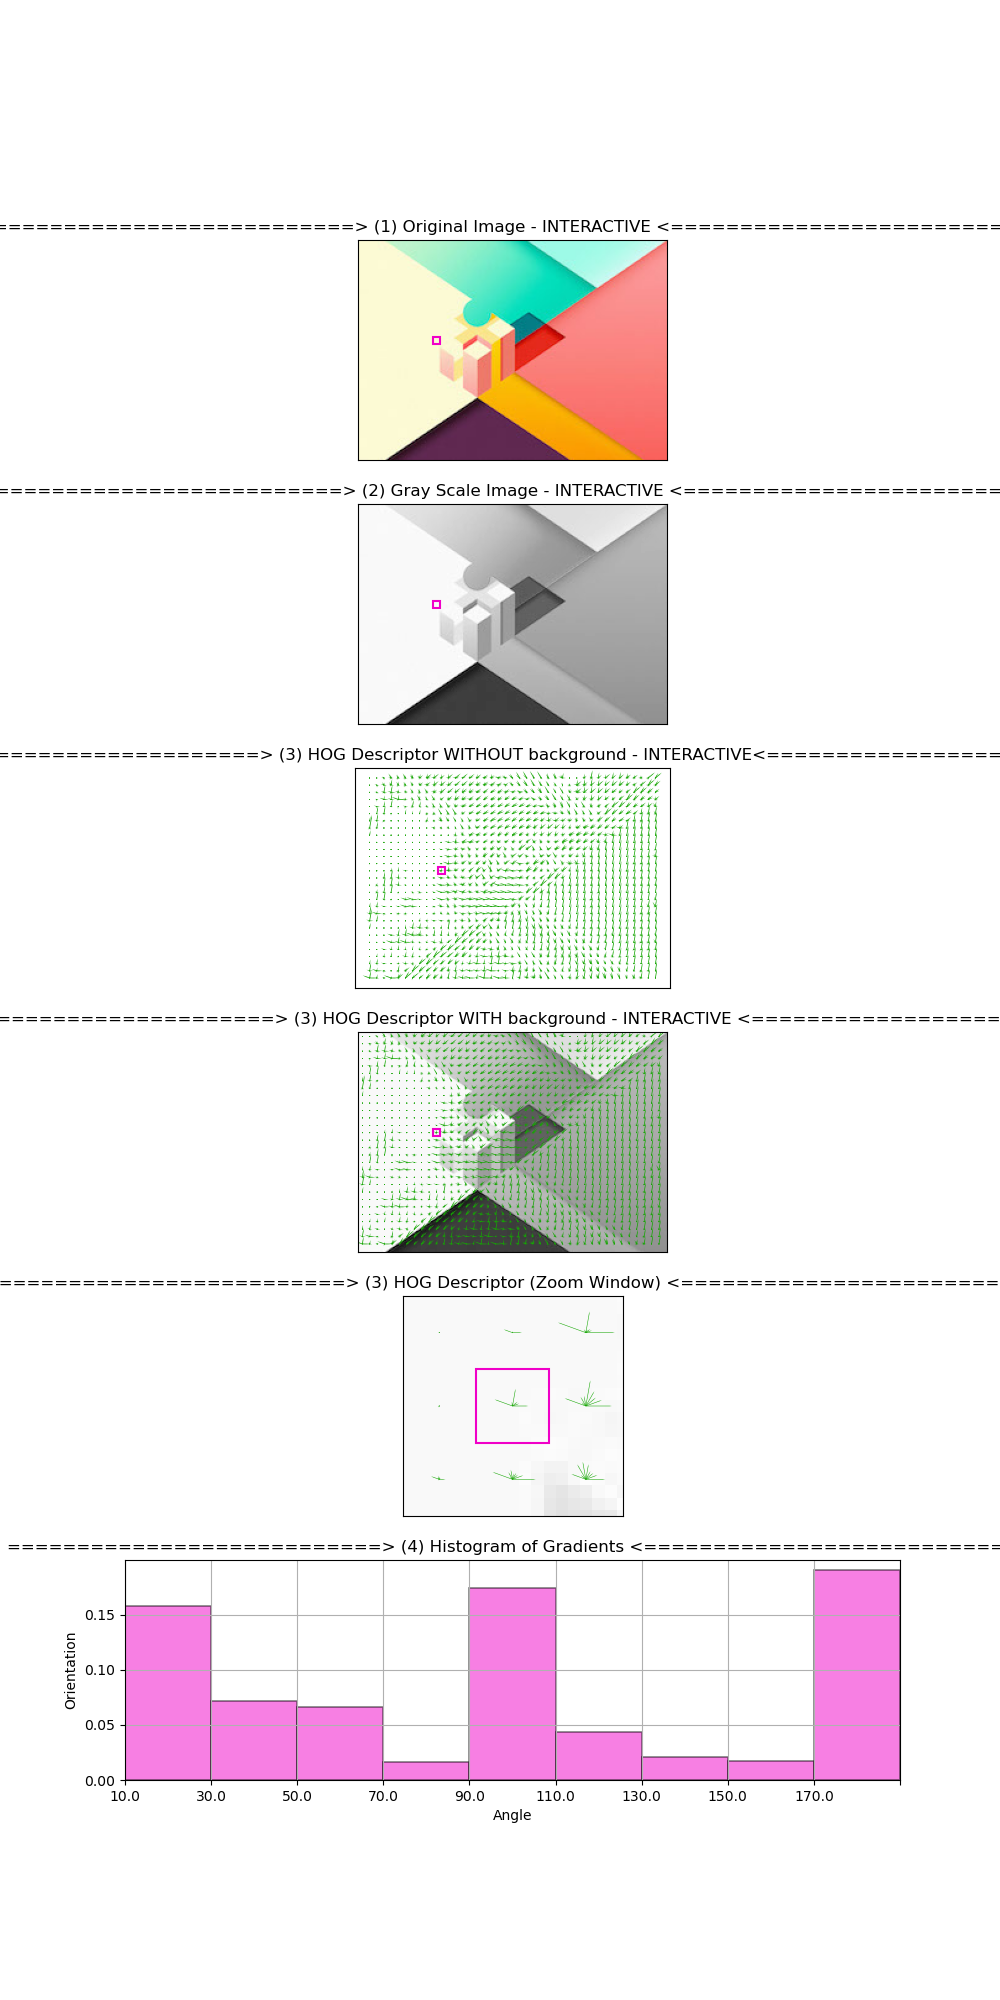

C:\Users\student\AppData\Local\Temp\ipykernel_3844\3822505465.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  e.set_xticklabels(angle_axis)


In [44]:
%matplotlib notebook

# Setting the default figure size
plt.rcParams['figure.figsize'] = [10, 20]

# Creating figures with 5 subplots
fig, (a, b, c1, c2, d, e) = plt.subplots(6, 1)

# Defining colors

greenish = '#16a704'

""" Visualizing BEFORE interactive mode """

# Visializing (a - Original image)
a.imshow(image)
a.set_title("===========================> (1) Original Image - INTERACTIVE <===========================")
a.set_aspect(aspect = 1)
a.xaxis.set_visible(False)
a.yaxis.set_visible(False)

# Visualizing (b - Gray scale image)
b.imshow(gray_image, cmap = 'gray')
b.set_title("===========================> (2) Gray Scale Image - INTERACTIVE <===========================")
b.set_aspect(aspect = 1)
b.xaxis.set_visible(False)
b.yaxis.set_visible(False)

# Visualizing (c1 - HOG descriptor or feature vector WITHOUT background))
c1.quiver(Y, X, U, V, color = greenish, headwidth = 0, headlength = 0, scale_units = 'inches', scale = 5)
c1.invert_yaxis() # Because it's upside down
c1.set_aspect(aspect = 1)
c1.set_facecolor('white')
c1.set_title("===========================> (3) HOG Descriptor WITHOUT background - INTERACTIVE <===========================")
c1.xaxis.set_visible(False)
c1.yaxis.set_visible(False)

# Visualizing (c2 - HOG descriptor or feature vector WITH background))
c2.quiver(Y, X, U, V, color = greenish, headwidth = 0, headlength = 0, scale_units = 'inches', scale = 5)
c2.invert_yaxis() # Because it's upside down
c2.set_aspect(aspect = 1)
c2.imshow(gray_image, cmap = 'gray')
c2.set_facecolor('white')
c2.set_title("===========================> (3) HOG Descriptor WITH background - INTERACTIVE <===========================")
c2.xaxis.set_visible(False)
c2.yaxis.set_visible(False)

# Set the title in d and e
d.set(title = '===========================> (3) HOG Descriptor (Zoom Window) <===========================', xlim = (0, 18), ylim = (0, 18), autoscale_on = False)
e.set(title = '===========================> (4) Histogram of Gradients <===========================')
e.set_xticklabels(angle_axis)
e.set_xlabel('Angle')
e.set_ylabel("Orientation")
"""
# Eliminiating the axis number in d and e
d.xaxis.set_visible(False)
d.yaxis.set_visible(False)
e.xaxis.set_visible(False)
e.yaxis.set_visible(False)
"""


""" Visualizing after interactive mode """
# Define function for interactive zoom
def onpress(event):
    
    #Unless the left mouse button is pressed do nothing
    if event.button != 1:
        return
    
    # Only accept clicks for subplots a and b
    if event.inaxes in [a, b, c1, c2]:
        
        # Get mouse click coordinates
        x, y = event.xdata, event.ydata
        
        # Select the cell closest to the mouse click coordinates
        cell_num_x = np.uint32(x / cell_size[0])
        cell_num_y = np.uint32(y / cell_size[1])
        
        # Set the edge coordinates of the rectangle patch
        edgex = x - (x % cell_size[0])
        edgey = y - (y % cell_size[1])
        
        # Create a rectangle patch that matches the the cell selected above        
        rect = patches.Rectangle((edgex, edgey),
                                  cell_size[0], cell_size[1],
                                  linewidth = 1.5,
                                  edgecolor = '#f000c8',
                                  facecolor='none')
        
        # A single patch can only be used in a single plot. Create copies of the patch to use in the other subplots
        rect2 = copy.copy(rect)
        rect3 = copy.copy(rect)
        rect4 = copy.copy(rect)
        rect5 = copy.copy(rect)
        
        
        # Updating (a - Original image)
        a.clear()
        a.set(title = '===========================> (1) Original Image - INTERACTIVE <===========================')
        a.imshow(image)
        a.set_aspect(aspect = 1)
        a.add_patch(rect)
        a.xaxis.set_visible(False)
        a.yaxis.set_visible(False)
        
        # Updating (b - Gray scale image)
        b.clear()
        b.set(title = '===========================> (2) Gray Scale Image - INTERACTIVE <===========================')
        b.imshow(gray_image, cmap = 'gray')
        b.set_aspect(aspect = 1)
        b.add_patch(rect2)
        b.xaxis.set_visible(False)
        b.yaxis.set_visible(False)
        
        # Updating (c1 - HOG descriptor or feature vector WITHOUT background))
        c1.clear()
        c1.set(title = '===========================> (3) HOG Descriptor WITHOUT background - INTERACTIVE<===========================')
        c1.quiver(Y, X, U, V, color = greenish, headwidth = 0, headlength = 0, scale_units = 'inches', scale = 5)
        c1.invert_yaxis()
        c1.set_aspect(aspect = 1)
        c1.set_facecolor('white')
        c1.add_patch(rect3)
        c1.xaxis.set_visible(False)
        c1.yaxis.set_visible(False)
        
        # Updating (c2 - HOG descriptor or feature vector WITHOUT background))
        c2.clear()
        c2.set(title = '===========================> (3) HOG Descriptor WITH background - INTERACTIVE <===========================')
        c2.quiver(Y, X, U, V, color = greenish, headwidth = 0, headlength = 0, scale_units = 'inches', scale = 5)
        c2.invert_yaxis()
        c2.set_aspect(aspect = 1)
        c2.set_facecolor('white')
        c2.imshow(gray_image, cmap = 'gray')
        c2.add_patch(rect4)
        c2.xaxis.set_visible(False)
        c2.yaxis.set_visible(False)
        c2.imshow(gray_image, cmap = 'gray')
        
        # Updating (d - Zoom window)
        d.clear()
        d.set(title = '===========================> (3) HOG Descriptor (Zoom Window) <===========================')
        d.quiver(Y, X, U, V, color = greenish, headwidth = 0, headlength = 0, scale_units = 'inches', scale = 1)
        d.set_xlim(edgex - cell_size[0], edgex + (2 * cell_size[0]))
        d.set_ylim(edgey - cell_size[1], edgey + (2 * cell_size[1]))
        d.invert_yaxis()
        d.set_aspect(aspect = 1)
        d.set_facecolor('white')
        d.add_patch(rect5)
        d.xaxis.set_visible(False)
        d.yaxis.set_visible(False)
        d.imshow(gray_image, cmap = 'gray')

        # Updating (e - Histogram of gradients)
        e.clear()
        e.set(title = '===========================> (4) Histogram of Gradients <===========================')
        e.grid()
        e.set_xlim(0, 180)
        e.set_xticklabels(angle_axis)
        e.set_xlabel('Angle')
        e.set_ylabel("Orientation")
        e.bar(angle_axis,
              ave_grad[cell_num_y, cell_num_x, :],
              180 // num_bins,
              align = 'center',
              alpha = 0.5,
              linewidth = 1.2,
              edgecolor = 'k',
              color = '#f000c8')

        fig.canvas.draw()

# Create a connection between the figure and the mouse click
fig.canvas.mpl_connect('button_press_event', onpress)
plt.show()